In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib

In [12]:
#读取文件
train_pro = pd.read_csv('分省.csv', encoding='utf-8')
#display(train_pro.info())
#display(train_pro.head())

train_city = pd.read_csv('地级市.csv', encoding='utf-8')
#display(train_city.info())
#display(train_city.head())

validition= pd.read_csv('验证集.csv', encoding='utf-8')
#display(validition.info())
#display(validition.head())

prediction = pd.read_csv('预测集.csv', encoding='utf-8')
#display(prediction.info())
#display(prediction.head())

In [9]:
#训练模型_分省
train_pro_dna = train_pro.dropna()
train_pro_dna = train_pro_dna.drop(train_pro_dna[train_pro_dna.PROVINCE=='全国'].index)
col = ['GDP','POP','BA','LDP','CCF']
X = train_pro_dna[col].values
y = train_pro_dna.loc[:, 'SLUDGE'].values
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

#param_grid_rf = {'n_estimators':np.arange(1000,3000,200)}
RF = RandomForestRegressor(n_estimators=1400, random_state=1)
#RF_cv = GridSearchCV(RF, param_grid_rf)
RF.fit(X, y)
RF.score(X, y)
#RF_cv.best_params_

0.9726363564808808

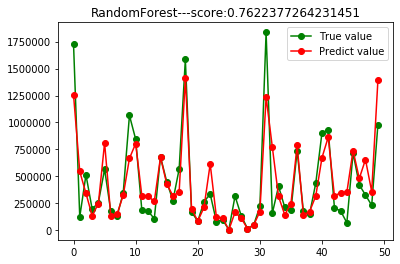

In [10]:

validition_vald = validition
validition_vald = validition_vald.drop(validition_vald[validition_vald.PROVINCE=='全国'].index)
vald_sludge = validition_vald['SLUDGE']
validition_vald = validition_vald[col]
score_vald = RF.score(validition_vald, vald_sludge )
result_vald = RF.predict(validition_vald)
plt.plot(np.arange(50), vald_sludge[:50], "go-", label="True value")
plt.plot(np.arange(50), result_vald[:50], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score_vald}")
plt.legend(loc="best")
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
D:\Anaconda\lib\site-pack

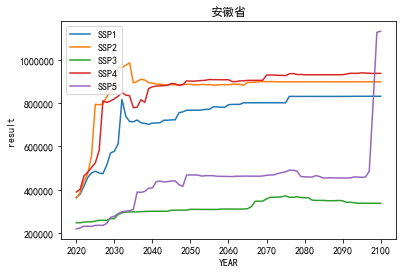

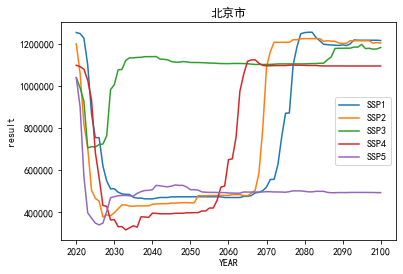

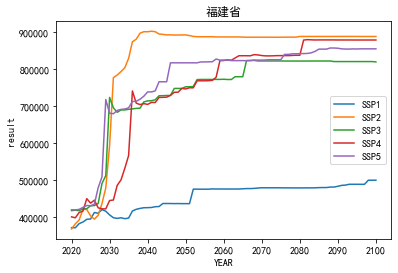

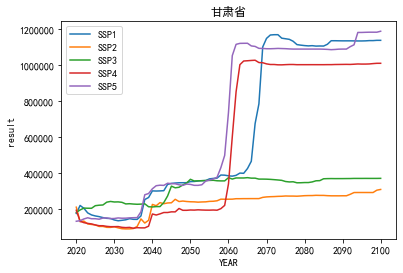

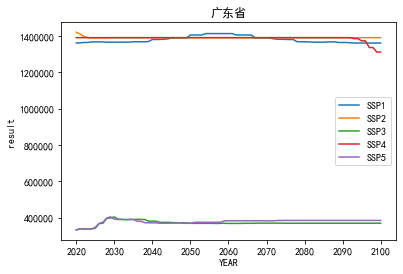

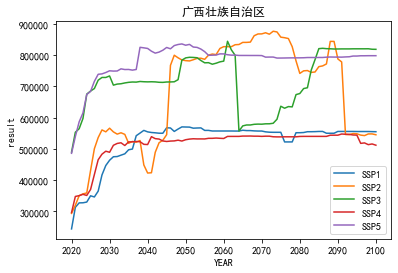

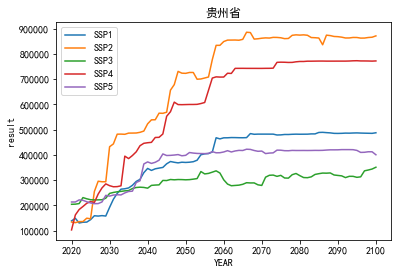

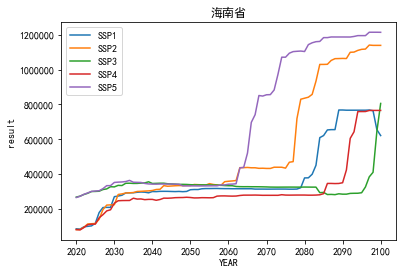

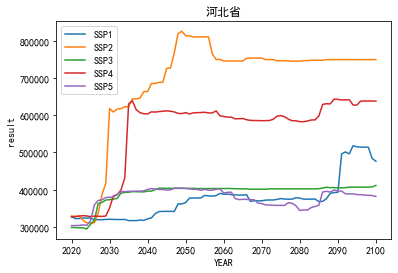

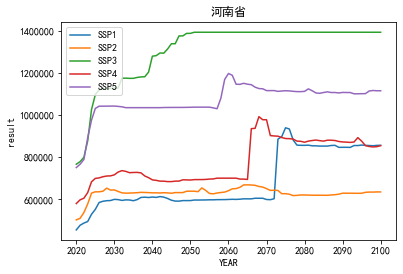

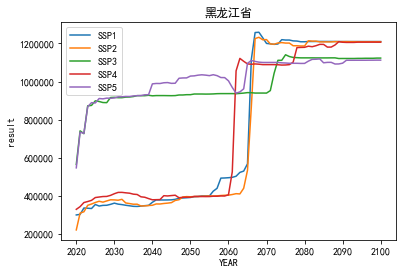

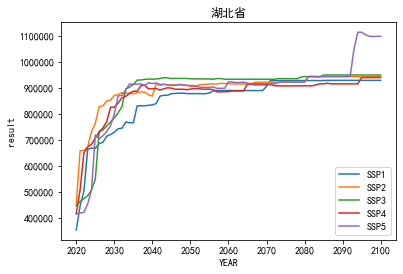

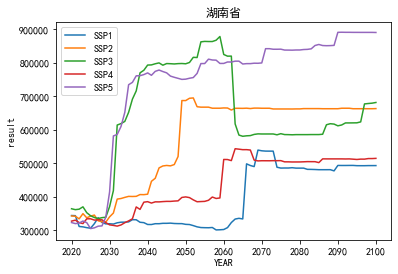

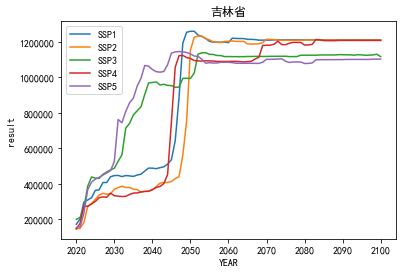

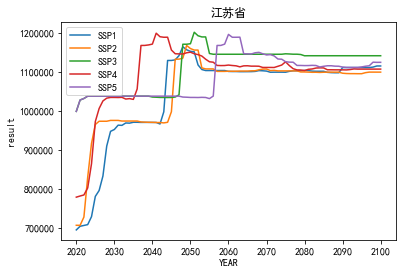

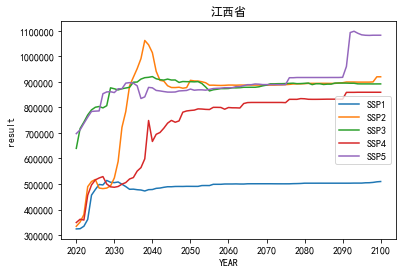

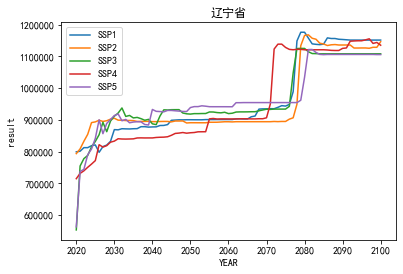

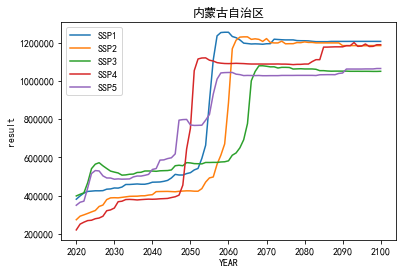

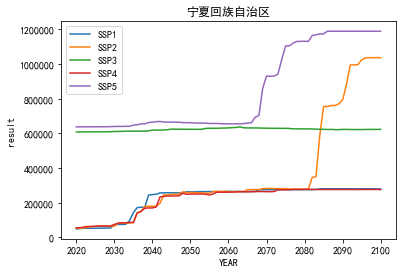

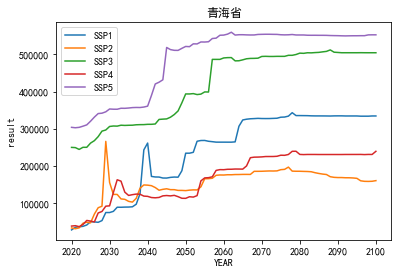

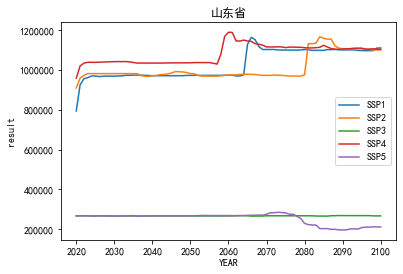

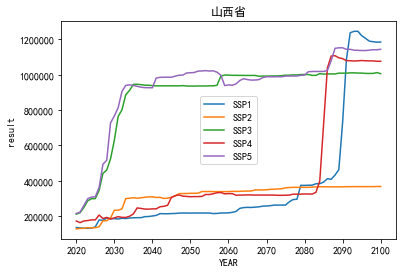

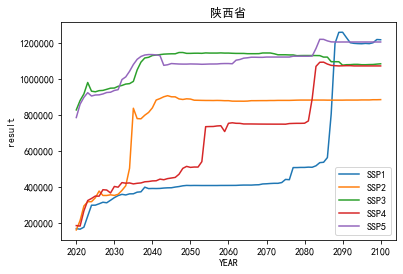

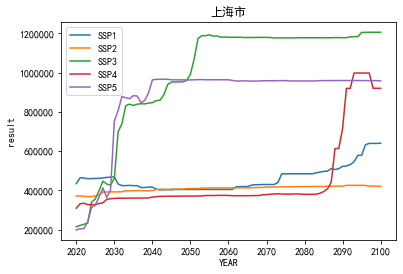

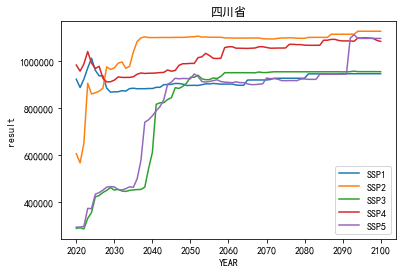

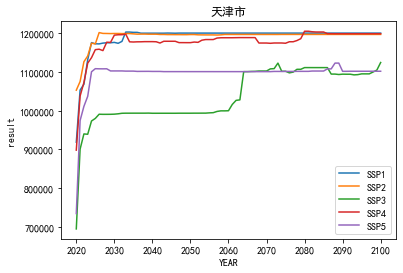

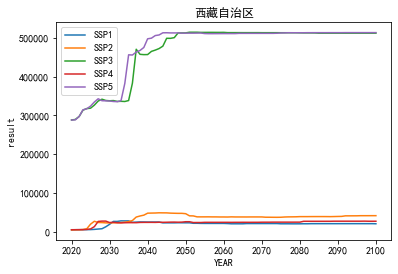

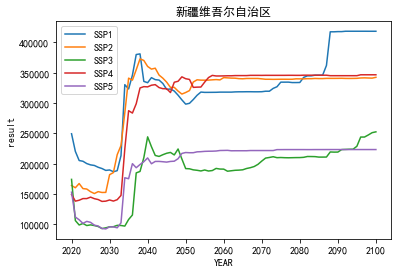

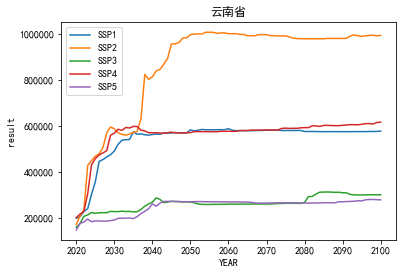

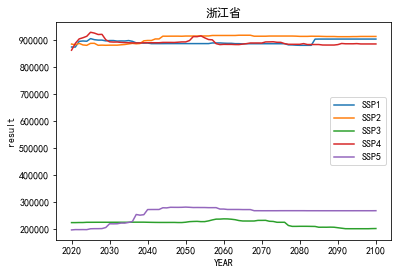

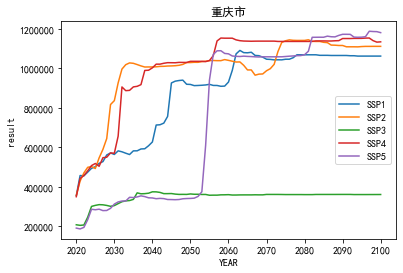

In [11]:
#预测集
prediction_pred = prediction[col]
result_pred = RF.predict(prediction_pred)
prediction['result'] = result_pred
prediction.to_csv('prediction_pro_0605test.csv', encoding = 'utf_8_sig')
prediction = prediction.groupby(['SSP','YEAR']).sum().reset_index()
plt.rcParams['font.sans-serif']=['SimHei']    #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False   #用来|正常显示负号
matplotlib.rcParams['font.family'] = 'SimHei'  
matplotlib.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
SSP1 = prediction[prediction['SSP'] == 'SSP1']
SSP2 = prediction[prediction['SSP'] == 'SSP2']
SSP3 = prediction[prediction['SSP'] == 'SSP3']
SSP4 = prediction[prediction['SSP'] == 'SSP4']
SSP5 = prediction[prediction['SSP'] == 'SSP5']
prediction_pro = pd.read_csv('prediction_pro_0605test.csv', encoding='utf-8')
province = prediction_pro['PROVINCE'].unique()
def show_pro(pro, df):
    df = df[df['PROVINCE'] == pro]
    sns.lineplot(x='YEAR', y='result', data=df, hue='SSP')
    plt.title(pro)
    plt.legend(['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5'])
for (i, pro) in enumerate(province):
    plt.figure(i)
    show_pro(pro,prediction_pro)

### 污水管网优化设计方案
污水管道优化设计的目标是在满足约束条件时同时使得整个工程造价最小

目标函数：

$$
F=\min \left\{ \sum_{i=1}^N{C\left( D_i,H_i \right) L_i} \right\} 
$$


约束条件：
$$
\frac{h}{D}\le \left( \frac{h}{D} \right) _{\max}
$$

$$
V_{\min}\le V\le V_{\max}
$$

$$
D\ge D_{\min}
$$

$$
H_{\min}\le H\le H_{\max}
$$

$$
V=\frac{1}{n}R^{\frac{2}{3}}I^{\frac{1}{2}}
$$

V：设计流速，D：管径，：H：管道埋深，L：管道长度，N：管段数量


C：管径与埋深的成本函数，根据实际情况确定

I：坡度，通过高程数据计算

n：管壁粗糙系数，根据材质确定

R：水力半径，通过管径计算

h：水深，根据实际确定


N：根据实际情况确定，污水收集点与主管道之间相对位置关系



利用智能优化算法搜索最优解：遗传，蚁群，粒子群等；优化设计方案
